In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_data = pd.read_csv(r'D:\Dc floor\train.csv')
test_data = pd.read_csv(r'D:\Dc floor\test.csv')
train_data.head()

,时间,小区名,小区房屋出租数量,楼层,总楼层,房屋面积,房屋朝向,居住状态,卧室数量,厅的数量,卫的数量,出租方式,区,位置,地铁线路,地铁站点,距离,装修情况,月租金
0,1,3072,0.128906,2,0.236364,0.008628,东南,NaN,1,1,1,NaN,11.0,118.0,2.0,40.0,0.764167,NaN,5.602716
1,1,3152,0.132812,1,0.381818,0.017046,东,NaN,1,0,0,NaN,10.0,100.0,4.0,58.0,0.709167,NaN,16.977929
2,1,5575,0.042969,0,0.290909,0.010593,东南,NaN,2,1,2,NaN,12.0,130.0,5.0,37.0,0.572500,NaN,8.998302
3,1,3103,0.085938,2,0.581818,0.019199,南,NaN,3,2,2,NaN,7.0,90.0,2.0,63.0,0.658333,NaN,5.602716
4,1,5182,0.214844,0,0.545455,0.010427,东北,NaN,2,1,1,NaN,3.0,31.0,NaN,NaN,NaN,NaN,7.300509


In [3]:
train_data.columns=['time','cell name','houses rent','floor','total floor','area','face','status','bedrooms','parlour','bathroom','rental mode','district','position','subway lines','subway station','long','renovation','price']
train_data.head()

,time,cell name,houses rent,floor,total floor,area,face,status,bedrooms,parlour,bathroom,rental mode,district,position,subway lines,subway station,long,renovation,price
0,1,3072,0.128906,2,0.236364,0.008628,东南,NaN,1,1,1,NaN,11.0,118.0,2.0,40.0,0.764167,NaN,5.602716
1,1,3152,0.132812,1,0.381818,0.017046,东,NaN,1,0,0,NaN,10.0,100.0,4.0,58.0,0.709167,NaN,16.977929
2,1,5575,0.042969,0,0.290909,0.010593,东南,NaN,2,1,2,NaN,12.0,130.0,5.0,37.0,0.572500,NaN,8.998302
3,1,3103,0.085938,2,0.581818,0.019199,南,NaN,3,2,2,NaN,7.0,90.0,2.0,63.0,0.658333,NaN,5.602716
4,1,5182,0.214844,0,0.545455,0.010427,东北,NaN,2,1,1,NaN,3.0,31.0,NaN,NaN,NaN,NaN,7.300509


In [4]:
train_data['face']=train_data['face'].str.partition(' ').get(0)
title_Dict = {}
title_Dict.update(dict.fromkeys(['东'],'0'))
title_Dict.update(dict.fromkeys(['东北'],'1'))
title_Dict.update(dict.fromkeys(['北'],'2'))
title_Dict.update(dict.fromkeys(['西北'],'3'))
title_Dict.update(dict.fromkeys(['西'],'4'))
title_Dict.update(dict.fromkeys(['西南'],'5'))
title_Dict.update(dict.fromkeys(['南'],'6'))
title_Dict.update(dict.fromkeys(['东南'],'7'))
train_data['face'] = train_data['face'].map(title_Dict)
train_data['face']=train_data['face'].convert_objects(convert_numeric=True)

In [5]:
train_data['status']=train_data['status'].fillna(0)
train_data['rental mode']=train_data['rental mode'].fillna(2)
train_data['renovation']=train_data['renovation'].fillna(0)
train_data.head(20)

,time,cell name,houses rent,floor,total floor,area,face,status,bedrooms,parlour,bathroom,rental mode,district,position,subway lines,subway station,long,renovation,price
0,1,3072,0.128906,2,0.236364,0.008628,7,0.0,1,1,1,2.0,11.0,118.0,2.0,40.0,0.764167,0.0,5.602716
1,1,3152,0.132812,1,0.381818,0.017046,0,0.0,1,0,0,2.0,10.0,100.0,4.0,58.0,0.709167,0.0,16.977929
2,1,5575,0.042969,0,0.290909,0.010593,7,0.0,2,1,2,2.0,12.0,130.0,5.0,37.0,0.572500,0.0,8.998302
3,1,3103,0.085938,2,0.581818,0.019199,6,0.0,3,2,2,2.0,7.0,90.0,2.0,63.0,0.658333,0.0,5.602716
4,1,5182,0.214844,0,0.545455,0.010427,1,0.0,2,1,1,2.0,3.0,31.0,NaN,NaN,NaN,0.0,7.300509
5,1,1192,0.039062,2,0.309091,0.012579,6,0.0,2,1,1,2.0,3.0,143.0,3.0,59.0,0.495833,0.0,4.923599
6,1,1122,0.125000,0,0.381818,0.010593,6,0.0,3,1,1,2.0,11.0,48.0,2.0,9.0,0.193333,0.0,6.621392
7,1,1251,0.128906,2,0.363636,0.018040,6,0.0,4,2,2,2.0,12.0,52.0,NaN,NaN,NaN,0.0,14.091681
8,1,4718,0.246094,2,0.309091,0.007850,5,0.0,1,1,1,2.0,3.0,143.0,NaN,NaN,NaN,0.0,4.584041
9,1,2654,0.218750,2,0.890909,0.020026,7,0.0,2,1,2,2.0,10.0,43.0,4.0,58.0,0.400000,0.0,39.558574


In [6]:
district_mean_dis=train_data['district'].mean()
district_mean_dis
train_data['district']=train_data['district'].fillna(district_mean_dis)
district_mean_pos=train_data['position'].mean()
print(district_mean_pos)
train_data['position']=train_data['position'].fillna(district_mean_pos)
district_mean_hou=train_data['houses rent'].mean()
print(district_mean_hou)
train_data['houses rent']=train_data['houses rent'].fillna(district_mean_hou)
train_data['subway lines']=train_data['subway lines'].fillna(0)
train_data['subway station']=train_data['subway station'].fillna(0)
train_data['long']=train_data['long'].fillna(0)
ordinal_cols={'status','rental mode','floor','subway lines','renovation','face'}
for col in ordinal_cols:
    dummies = pd.get_dummies(train_data[col],drop_first=False)
    dummies =dummies.add_prefix("{}#".format(col))
    train_data.drop(col,axis=1,inplace=True)
    train_data=train_data.join(dummies)  

67.9459818429784
0.12415104017505549


In [7]:
train_data['type']=train_data['bedrooms']+train_data['parlour']+train_data['bathroom']
train_data['area_square']=train_data['area']*train_data['area']
train_data.head()

,time,cell name,houses rent,total floor,area,bedrooms,parlour,bathroom,district,position,...,renovation#2.0,renovation#3.0,renovation#4.0,renovation#5.0,renovation#6.0,rental mode#0.0,rental mode#1.0,rental mode#2.0,type,area_square
0,1,3072,0.128906,0.236364,0.008628,1,1,1,11.0,118.0,...,0,0,0,0,0,0,0,1,3,0.000074
1,1,3152,0.132812,0.381818,0.017046,1,0,0,10.0,100.0,...,0,0,0,0,0,0,0,1,1,0.000291
2,1,5575,0.042969,0.290909,0.010593,2,1,2,12.0,130.0,...,0,0,0,0,0,0,0,1,5,0.000112
3,1,3103,0.085938,0.581818,0.019199,3,2,2,7.0,90.0,...,0,0,0,0,0,0,0,1,7,0.000369
4,1,5182,0.214844,0.545455,0.010427,2,1,1,3.0,31.0,...,0,0,0,0,0,0,0,1,4,0.000109


In [8]:
train_data['price']=np.log1p(train_data['price'])
train_data_Y=train_data['price']
#特征选择
train_data=train_data.drop('price',axis=1)
train_data=train_data.drop('floor#2',axis=1)
train_data=train_data.drop('status#1.0',axis=1)
train_data=train_data.drop('face#1',axis=1)
train_data=train_data.drop('renovation#5.0',axis=1)
#train_data=train_data.drop('face#2',axis=1)
train_data=train_data.drop('face#3',axis=1)
train_data=train_data.drop('subway lines#1.0',axis=1)
#train_data=train_data.drop('status#2.0',axis=1)

train_data=train_data.drop('position',axis=1)
train_data=train_data.drop('rental mode#1.0',axis=1)
train_data=train_data.drop('houses rent',axis=1)
train_data=train_data.drop('time',axis=1)
train_data_X=train_data.drop('cell name',axis=1)
#train_data_Y=train_data['price']
train_data_X.head()

,total floor,area,bedrooms,parlour,bathroom,district,subway station,long,face#0,face#2,...,renovation#0.0,renovation#1.0,renovation#2.0,renovation#3.0,renovation#4.0,renovation#6.0,rental mode#0.0,rental mode#2.0,type,area_square
0,0.236364,0.008628,1,1,1,11.0,40.0,0.764167,0,0,...,1,0,0,0,0,0,0,1,3,0.000074
1,0.381818,0.017046,1,0,0,10.0,58.0,0.709167,1,0,...,1,0,0,0,0,0,0,1,1,0.000291
2,0.290909,0.010593,2,1,2,12.0,37.0,0.572500,0,0,...,1,0,0,0,0,0,0,1,5,0.000112
3,0.581818,0.019199,3,2,2,7.0,63.0,0.658333,0,0,...,1,0,0,0,0,0,0,1,7,0.000369
4,0.545455,0.010427,2,1,1,3.0,0.0,0.000000,0,0,...,1,0,0,0,0,0,0,1,4,0.000109


In [9]:
#测试集处理
test_data.columns=['id','time','cell name','houses rent','floor','total floor','area','face','status','bedrooms','parlour','bathroom','rental mode','district','position','subway lines','subway station','long','renovation']
test_data['face']=test_data['face'].str.partition(' ').get(0)
title_Dict = {}
title_Dict.update(dict.fromkeys(['东'],'0'))
title_Dict.update(dict.fromkeys(['东北'],'1'))
title_Dict.update(dict.fromkeys(['北'],'2'))
title_Dict.update(dict.fromkeys(['西北'],'3'))
title_Dict.update(dict.fromkeys(['西'],'4'))
title_Dict.update(dict.fromkeys(['西南'],'5'))
title_Dict.update(dict.fromkeys(['南'],'6'))
title_Dict.update(dict.fromkeys(['东南'],'7'))

test_data['face'] = test_data['face'].map(title_Dict)
test_data['face']=test_data['face'].convert_objects(convert_numeric=True)

test_data['status']=test_data['status'].fillna(0)
test_data['rental mode']=test_data['rental mode'].fillna(2)
test_data['renovation']=test_data['renovation'].fillna(0)


district_mean_dis=test_data['district'].mean()
print(district_mean_dis)
test_data['district']=test_data['district'].fillna(district_mean_dis)

district_mean_pos=test_data['position'].mean()
print(district_mean_pos)
test_data['position']=test_data['position'].fillna(district_mean_pos)

district_mean_hou=test_data['houses rent'].mean()
print(district_mean_hou)
test_data['houses rent']=test_data['houses rent'].fillna(district_mean_hou)

test_data['subway lines']=test_data['subway lines'].fillna(0)
test_data['subway station']=test_data['subway station'].fillna(0)
test_data['long']=test_data['long'].fillna(0)
test_data.isnull().sum().sort_values(ascending=False).head(10)

8.04298992340365
69.04073290799552
0.11947943700339514


renovation     0
status         0
time           0
cell name      0
houses rent    0
floor          0
total floor    0
area           0
face           0
bedrooms       0
dtype: int64

In [10]:
ordinal_col={'status','rental mode','floor','subway lines','renovation','face'}
for col in ordinal_col:
    dummies = pd.get_dummies(test_data[col],drop_first=False)
    dummies =dummies.add_prefix("{}#".format(col))
    test_data.drop(col,axis=1,inplace=True)
    test_data=test_data.join(dummies)
test_data['type']=test_data['bedrooms']+test_data['parlour']+test_data['bathroom']
test_data['area_square']=test_data['area']*test_data['area']
test_data_id = test_data['id']
test_data_id.head()
#特征选择
test_data=test_data.drop('id',axis=1)
test_data=test_data.drop('floor#2',axis=1)
test_data=test_data.drop('status#1.0',axis=1)
test_data=test_data.drop('face#1',axis=1)
test_data=test_data.drop('renovation#5.0',axis=1)
#test_data=test_data.drop('face#2',axis=1)
test_data=test_data.drop('face#3',axis=1)
test_data=test_data.drop('subway lines#1.0',axis=1)
#test_data=test_data.drop('status#2.0',axis=1)
test_data=test_data.drop('rental mode#1.0',axis=1)
test_data=test_data.drop('houses rent',axis=1)
test_data=test_data.drop('position',axis=1)
test_data=test_data.drop('time',axis=1)
test_data=test_data.drop('cell name',axis=1)
test_data.head()

,total floor,area,bedrooms,parlour,bathroom,district,subway station,long,face#0,face#2,...,renovation#0.0,renovation#1.0,renovation#2.0,renovation#3.0,renovation#4.0,renovation#6.0,rental mode#0.0,rental mode#2.0,type,area_square
0,0.600000,0.007117,2,1,1,10.0,0.0,0.000000,1,0,...,0,0,0,0,0,1,0,0,4,0.000051
1,0.472727,0.007448,2,1,1,3.0,0.0,0.000000,1,0,...,1,0,0,0,0,0,0,1,4,0.000055
2,0.709091,0.014068,3,2,2,10.0,74.0,0.400833,0,0,...,1,0,0,0,0,0,0,1,7,0.000198
3,0.090909,0.008937,2,1,1,6.0,17.0,0.384167,0,0,...,1,0,0,0,0,0,0,1,4,0.000080
4,0.218182,0.008606,2,1,1,6.0,114.0,0.598333,0,0,...,1,0,0,0,0,0,0,1,4,0.000074


In [11]:
x_train_val=train_data_X[:1000]
x_train_val.head()
y_train_val=train_data_Y[:1000]
y_train=np.expm1(y_train_val)
#y_train.head()

In [88]:
from sklearn.ensemble import RandomForestRegressor
clf= RandomForestRegressor(n_estimators=200, max_features=0.5)
clf.fit(train_data_X,train_data_Y)
y_ran = np.expm1(clf.predict(x_train_val))
from sklearn.metrics import mean_squared_error
rmse_alg = mean_squared_error(y_train,y_ran) #time = 0.5min  11269.5496804
print('随机森林：',rmse_alg)

随机森林： 0.2489477466270769


In [89]:
from xgboost import XGBRegressor
clf = XGBRegressor(max_depth=30,n_estimators=200,base_estimator=ran)
clf.fit(train_data_X,train_data_Y)
y_ran = np.expm1(clf.predict(x_train_val))
from sklearn.metrics import mean_squared_error
rmse_alg = mean_squared_error(y_train,y_ran) #time = 0.5min  11269.5496804
print('随机森林：',rmse_alg)

随机森林： 0.1813743769046001


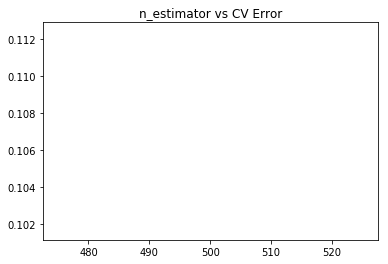

In [12]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
#clf = XGBRegressor(max_depth=30,n_estimators=200)  , base_estimator=clf
params = [500,800,1000]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf,train_data_X,train_data_Y, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

In [15]:
test_scores

[0.10617050192576968,
 0.10212918473380347,
 0.10220032638384999,
 0.10220128521844578]

Text(0.5,1,'max_depth vs CV Error')

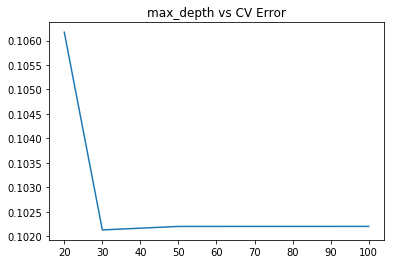

In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
params = [20,30,50,100]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf,train_data_X,train_data_Y, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)
plt.title("max_depth vs CV Error")

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
#clf = XGBRegressor(max_depth=30,n_estimators=200)  , base_estimator=clf
params = [500,800,1000]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf,train_data_X,train_data_Y, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

In [ ]:
from sklearn.ensemble import RandomForestRegressor
max_features = [.3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf,train_data_X,train_data_Y, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
params = [50,100,200,500,1000]
test_scores = []
for param in params:
    clf = AdaBoostClassifier(n_estimators = param)
    test_score = np.sqrt(-cross_val_score(clf,train_data_X,train_data_Y, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer
from  sklearn.model_selection  import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
#XGBRegressor(max_depth=30,n_estimators=200)  0.120966
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse
models = [GradientBoostingRegressor()]
names = ["sgd"]
for name, model in zip(names, models): 
    score = rmse_cv(model, train_data_X, train_data_Y)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

sgd: 0.288459, 0.0037


In [100]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()
#clf= KNeighborsClassifier(n_neighbors=1)
#clf = GradientBoostingRegressor()
clf.fit(train_data_X,train_data_Y)
y_ran = np.expm1(clf.predict(x_train_val))
from sklearn.metrics import mean_squared_error
rmse_alg = mean_squared_error(y_train,y_ran) #time = 0.5min  11269.5496804
print('随机森林：',rmse_alg)

ValueError: Unknown label type: (array([0.        , 0.15681509, 0.2403128 , 0.29234014, 0.41167105,
       0.51826815, 0.57716642, 0.61458894, 0.65066138, 0.66822109,
       0.68547778, 0.70244171, 0.71912267, 0.72899929, 0.73552993,
       0.75167233, 0.78319582, 0.81375588, 0.82869267, 0.85791316,
       0.87220933, 0.90020276, 0.91391099, 0.92743385, 0.95394302,
       0.96693866, 0.97080464, 0.97208999, 0.97976757, 0.99243398,
       1.00494196, 1.01606692, 1.01729542, 1.02949814, 1.04155374,
       1.05346573, 1.0768723 , 1.08837329, 1.09179795, 1.1109859 ,
       1.1221033 , 1.1287149 , 1.14397405, 1.15473262, 1.16537668,
       1.19664552, 1.2169611 , 1.22497316, 1.22696618, 1.24668096,
       1.25639449, 1.26601458, 1.28498148, 1.29433171, 1.31277391,
       1.32186902, 1.33981477, 1.3486683 , 1.35744414, 1.3833188 ,
       1.40020396, 1.406879  , 1.40854082, 1.42500887, 1.43314231,
       1.44121012, 1.4618868 , 1.46503022, 1.46738132, 1.4806008 ,
       1.4882961 , 1.50351131, 1.51103297, 1.51849847, 1.5405663 ,
       1.54781534, 1.5550122 , 1.56215764, 1.57629715, 1.58329263,
       1.59023952, 1.61079523, 1.62359863, 1.62426798, 1.63093689,
       1.63756163, 1.64414276, 1.65068087, 1.65652884, 1.65717651,
       1.67641404, 1.68903648, 1.69528846, 1.69902097, 1.69943069,
       1.6996417 , 1.70150159, 1.70767635, 1.71381322, 1.71991266,
       1.72294849, 1.72597512, 1.72899263, 1.73320189, 1.73799089,
       1.74986399, 1.75574809, 1.76741343, 1.77319546, 1.77894426,
       1.79599497, 1.79768416, 1.80720271, 1.82103801, 1.82378225,
       1.82924824, 1.83468451, 1.84707691, 1.85081823, 1.86143123,
       1.86669578, 1.87714247, 1.88077318, 1.88696675, 1.88748115,
       1.91286967, 1.91986445, 1.92483094, 1.92779903, 1.92927978,
       1.92977288, 1.93762954, 1.94493951, 1.94639512, 1.94929998,
       1.96179114, 1.96655419, 1.96987487, 1.97601276, 1.97648334,
       1.98491628, 1.9853827 , 1.98771153, 1.99003495, 1.99466566,
       1.996973  , 1.99743383, 2.00019436, 2.00843051, 2.012977  ,
       2.02065892, 2.02200845, 2.03095906, 2.05299123, 2.06598124,
       2.07412181, 2.07454844, 2.08515524, 2.09565072, 2.09606825,
       2.09981826, 2.10810159, 2.11508888, 2.11590771, 2.11631688,
       2.12932255, 2.13656458, 2.14295821, 2.14415248, 2.14693357,
       2.1485193 , 2.15641044, 2.17200834, 2.1758701 , 2.18227467,
       2.19495829, 2.21257493, 2.21368893, 2.2247612 , 2.23171075,
       2.23207518, 2.23991466, 2.25012948, 2.26080763, 2.26751196,
       2.26786358, 2.28182785, 2.28528866, 2.29217455, 2.2955998 ,
       2.30207563, 2.3024153 , 2.31255223, 2.31858543, 2.31925355,
       2.32058844, 2.32258744, 2.32922206, 2.33581296, 2.34333917,
       2.3475682 , 2.35210262, 2.36175055, 2.36813117, 2.38390686,
       2.38578332, 2.38703235, 2.39325418, 2.39943753, 2.40955721,
       2.40965789, 2.41473069, 2.41776145, 2.42114504, 2.42186861,
       2.42210968, 2.42379556, 2.42949444, 2.42979348, 2.43545837,
       2.4399081 , 2.44168246, 2.44463275, 2.44904193, 2.45158452,
       2.45343175, 2.45896467, 2.45925503, 2.47080084, 2.47366658,
       2.47680944, 2.48221486, 2.48787338, 2.49192778, 2.49215255,
       2.49282653, 2.49321948, 2.49350007, 2.50188118, 2.51569546,
       2.52253169, 2.5293215 , 2.54276437, 2.55602893, 2.56390402,
       2.56453135, 2.56515829, 2.56599361, 2.56911983, 2.57249558,
       2.57410155, 2.57947055, 2.58204158, 2.58971523, 2.59454493,
       2.59479848, 2.60739469, 2.61983421, 2.63212089, 2.64425843,
       2.6526679 , 2.65767984, 2.66337719, 2.6681003 , 2.67981141,
       2.68213726, 2.69138695, 2.71391863, 2.71414365, 2.73639399,
       2.74078525, 2.75816   , 2.76352828, 2.76886789, 2.77946233,
       2.7899457 , 2.80011388, 2.80032032, 2.8105884 , 2.82075212,
       2.84077482, 2.8506378 , 2.86040446, 2.86059882, 2.87583538,
       2.87736545, 2.87965618, 2.88914482, 2.89854427, 2.90911594,
       2.90970822, 2.91074385, 2.9170822 , 2.93528272, 2.9531579 ,
       2.97071915, 2.97662041, 2.98797732, 3.00157257, 3.00325905,
       3.0049427 , 3.02162504, 3.0347734 , 3.03803365, 3.05096939,
       3.05417735, 3.07006457, 3.08259508, 3.08570333, 3.10110128,
       3.10567481, 3.11626572, 3.11927121, 3.13120363, 3.1349035 ,
       3.14592169, 3.15029519, 3.16042626, 3.17472345, 3.18881911,
       3.20271884, 3.21642801, 3.22995178, 3.2432951 , 3.24990058,
       3.26945919, 3.28228893, 3.29495614, 3.30497564, 3.3074649 ,
       3.31981913, 3.32959378, 3.33202259, 3.34407892, 3.35599162,
       3.36776408, 3.37939956, 3.38516692, 3.39090121, 3.3966028 ,
       3.40227207, 3.41351509, 3.45297443, 3.45726421, 3.46790884,
       3.47844135, 3.48886408, 3.4991793 , 3.5093892 , 3.51939535,
       3.51949591, 3.53940796, 3.55893125, 3.5685518 , 3.57808067,
       3.59687027, 3.60502715, 3.61531332, 3.62214271, 3.6423554 ,
       3.64767715, 3.65998554, 3.66868541, 3.68586132, 3.7027472 ,
       3.73365965, 3.74375503, 3.7636451 , 3.78160101, 3.78314726,
       3.7984797 , 3.82104638, 3.82845684, 3.84311502, 3.85151934,
       3.85756144, 3.87518993, 3.89279   , 3.91334641, 3.92681962,
       3.93215848, 3.95972923, 3.96618315, 3.99002105, 3.99159022,
       4.01514332, 4.02246735, 4.04054612, 4.05241957, 4.07344286,
       4.07462682, 4.07575173, 4.08150069, 4.10975994, 4.1372425 ,
       4.14620221, 4.16398993, 4.19004053, 4.20535125, 4.21542969,
       4.22043108, 4.22341995, 4.25475743, 4.26435236, 4.27965636,
       4.28561016, 4.31099281, 4.35555453, 4.39821493, 4.40860161,
       4.41888152, 4.42966406, 4.43912963, 4.47069729, 4.47843592,
       4.51625547, 4.55269668, 4.58785648, 4.61512052]),)

In [20]:
#模型选择
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
max_features = [20,50,100,200,500]
test_scores = []
for max_feat in max_features:
    clf = AdaBoostClassifier(n_estimators=max_feat)
#clf = RandomForestRegressor(n_estimators=100, max_features=0.5)
    test_score = np.sqrt(-cross_val_score(clf, train_data_X, train_data_Y, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error")

ValueError: Unknown label type: 'continuous'

In [78]:
#模型融合
from sklearn.model_selection import KFold
# Some useful parameters which will come in handy later on
ntrain = train_data_X.shape[0]
ntest = test_data.shape[0]
SEED = 0 #for reproducibility
NFOLDS = 7 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS,random_state=SEED,shuffle=False)
def get_out_fold(clf,x_train,y_train,x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS,ntest))
    
    for i, (train_index,test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        clf.fit(x_tr,y_tr.astype('int'))
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i,:] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1,1),oof_test.reshape(-1,1)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
 
rf = RandomForestClassifier(n_estimators=200,warm_start=True,max_features=0.5,max_depth=6,min_samples_split=3,min_samples_leaf=2,n_jobs=-1,verbose=0)
 
ada = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
 
et = ExtraTreesClassifier(n_estimators=500,n_jobs=-1,max_depth=8,min_samples_leaf=2,verbose=0)
 
gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.008,min_samples_split=3,min_samples_leaf=2,max_depth=5,verbose=0)
 
dt = DecisionTreeClassifier(max_depth=8)
 
knn = KNeighborsClassifier(n_neighbors=2)
 
svm = SVC(kernel='linear',C=0.025)

sgd = SGDRegressor(max_iter=1000,tol=1e-3)

In [80]:
# Create Numpy arrays of train,test and target(Survived) dataframes to feed into our models
x_train = train_data_X.values   #Creates an array of the train data
x_test = test_data.values   #Creates an array of the test data
y_train = train_data_Y.values


In [81]:
# Create our OOF train and test predictions.These base result will be used as new featurs
rf_oof_train,rf_oof_test = get_out_fold(rf,x_train,y_train,x_test)  # Random Forest
sgd_oof_train,sgd_oof_test = get_out_fold(sgd,x_train,y_train,x_test)  # Random Forest
'''ada_oof_train,ada_oof_test = get_out_fold(ada,x_train,y_train,x_test)  # AdaBoost 
et_oof_train,et_oof_test = get_out_fold(et,x_train,y_train,x_test)  # Extra Trees
gb_oof_train,gb_oof_test = get_out_fold(gb,x_train,y_train,x_test)  # Gradient Boost
dt_oof_train,dt_oof_test = get_out_fold(dt,x_train,y_train,x_test)  #Decision Tree
knn_oof_train,knn_oof_test = get_out_fold(knn,x_train,y_train,x_test)  # KNeighbors
svm_oof_train,svm_oof_test = get_out_fold(svm,x_train,y_train,x_test)  # Support Vector'''
print("Training is complete")

Training is complete


In [82]:
x_train =np.concatenate((rf_oof_train,sgd_oof_train),axis=1)
x_test =np.concatenate((rf_oof_test,sgd_oof_test),axis=1)

In [83]:
#xgb第二层的模型
from xgboost import XGBRegressor
ran= RandomForestRegressor(n_estimators=200, max_features=0.5)
#clf = XGBRegressor(max_depth=30,n_estimators=200,base_estimator=ran)
gbm = XGBRegressor(n_estimators=200,max_depth=30,base_estimator=ran).fit(x_train,y_train)
predictions = gbm.predict(x_test)

In [84]:
y_rf = np.expm1(predictions)
#获得提交结果
submission_df = pd.DataFrame(data= {'id': test_data_id, 'price':y_rf}) 
submission_df.to_csv(r'D:\king\xgboost18.csv',index=False,sep=',')

In [18]:
import heapq
data=[6,1,3,4,9,0,5,2,8,7]
heap=[]
for n in data:
    heapq.heappush(heap,n)
    

In [19]:
heap

[0, 2, 1, 4, 7, 3, 5, 6, 8, 9]

In [20]:
3 in [1,2,3]

True

In [22]:
alist=[3,6,5,13,9]
newlist=reversed(alist)
list(newlist)

[9, 13, 5, 6, 3]

In [23]:
x=[1,2,3]
y=[1,2,3]
x is y


False